In [1]:
import numpy as np
import scanpy as sp
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import sklearn as sk
from sklearn import svm
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV

seed = 2023 # DO NOT CHANGE!

In [2]:
print(f"sklearn version: {sk.__version__}")
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"scanpy version: {sp.__version__}")

sklearn version: 1.0.1
numpy version: 1.21.3
pandas version: 1.3.4
matplotlib version: 3.4.3
scanpy version: 1.9.1


# Load Data / Train-Test split
See model training notebooks for more information

In [4]:
data_folder = "../models/PBMC/"

with open(f"{data_folder}PBMC_Y_test.pkl", 'rb') as f:
    Y_test = np.array(pickle.load(f))
    
Y_test

array(['NK', 'CD8 Naive', 'CD14 Mono', ..., 'CD4 TCM', 'CD14 Mono',
       'CD4 Naive'], dtype=object)

# Load models / make predictions

In [5]:
model_names = ["PBMC_Test_pred_LogReg", "PBMC_Test_pred_RF", "PBMC_Test_pred_SVM"]
model_names_sanitizer_ = {
    'PBMC_Test_pred_LogReg': "LogReg",
    "PBMC_Test_pred_RF": "RF",
    "PBMC_Test_pred_SVM": "lSVM",
    "PBMC_MLP_pred": "MLP"
}
model_names_sanitizer = lambda x: np.vectorize(model_names_sanitizer_.get)(x)

model_names

['PBMC_Test_pred_LogReg', 'PBMC_Test_pred_RF', 'PBMC_Test_pred_SVM']

In [6]:
pred = {}
for m in model_names:
    with open(f"{data_folder}{m}.pkl", 'rb') as f:
        pred[m] = pickle.load(f)

In [7]:
pred

{'PBMC_Test_pred_LogReg': array(['NK', 'CD8 Naive', 'CD14 Mono', ..., 'CD4 TCM', 'CD14 Mono',
        'CD8 TEM'], dtype=object),
 'PBMC_Test_pred_RF': array(['CD8 TEM', 'CD4 Naive', 'CD14 Mono', ..., 'CD4 TCM', 'CD14 Mono',
        'CD8 TEM'], dtype=object),
 'PBMC_Test_pred_SVM': array(['NK', 'CD8 Naive', 'CD14 Mono', ..., 'CD4 TCM', 'CD14 Mono',
        'CD4 Naive'], dtype=object)}

In [8]:
# ADD MLP predictions
mlp_pred_file = "PBMC_MLP_pred"

with open(f"{data_folder}{mlp_pred_file}.pkl", 'rb') as f:
    tmp = pickle.load(f)
    pred[mlp_pred_file] = tmp["test_pred_labels"]
    model_names.append(mlp_pred_file)

In [9]:
pred

{'PBMC_Test_pred_LogReg': array(['NK', 'CD8 Naive', 'CD14 Mono', ..., 'CD4 TCM', 'CD14 Mono',
        'CD8 TEM'], dtype=object),
 'PBMC_Test_pred_RF': array(['CD8 TEM', 'CD4 Naive', 'CD14 Mono', ..., 'CD4 TCM', 'CD14 Mono',
        'CD8 TEM'], dtype=object),
 'PBMC_Test_pred_SVM': array(['NK', 'CD8 Naive', 'CD14 Mono', ..., 'CD4 TCM', 'CD14 Mono',
        'CD4 Naive'], dtype=object),
 'PBMC_MLP_pred': array(['NK', 'CD8 Naive', 'CD14 Mono', ..., 'CD4 TCM', 'CD14 Mono',
        'CD8 TEM'], dtype=object)}

In [10]:
model_names

['PBMC_Test_pred_LogReg',
 'PBMC_Test_pred_RF',
 'PBMC_Test_pred_SVM',
 'PBMC_MLP_pred']

# Models analysis

### Accuracy

In [11]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
[[n, accuracy_score(Y_test, p)] for n, p in pred.items()]

[['PBMC_Test_pred_LogReg', 0.8353430353430353],
 ['PBMC_Test_pred_RF', 0.6615384615384615],
 ['PBMC_Test_pred_SVM', 0.9413721413721414],
 ['PBMC_MLP_pred', 0.824948024948025]]

In [14]:
models_in_plot = model_names # plot every model except RF
model_names_in_plot = model_names_sanitizer(models_in_plot)

# Sample data
p_test = [accuracy_score(Y_test, pred[m]) for m in models_in_plot]
p_test_balanced = [balanced_accuracy_score(Y_test, pred[m]) for m in models_in_plot]

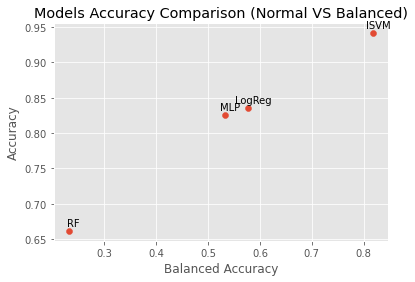

In [15]:
# Metrics to plot
x, y = p_test_balanced, p_test
x_label, y_label = "Balanced Accuracy", "Accuracy"

# Create scatter plot
plt.scatter(x, y)

# Add labels next to points
for label, x_, y_ in zip(model_names_in_plot, x, y):
    plt.annotate(label, (x_, y_), textcoords="offset points", xytext=vert_alignment, ha='center')

# Add title and labels
plt.title('Models Accuracy Comparison (Normal VS Balanced)')
plt.xlabel(x_label)
plt.ylabel(y_label)

# Show plot
plt.show()

### Precision / Recall / F1 scores

In [41]:
from sklearn.metrics import f1_score, classification_report

for n, p in predictions_models_test.items():
    print(n)
    print(classification_report(Y_test, p))
#[[n, f1_score(Y_test, p)] for n, p in predictions_models_test.items()]

logreg_atac_model
                  precision    recall  f1-score   support

            B1 B       0.97      0.61      0.75       508
      CD14+ Mono       0.86      0.99      0.92      2269
      CD16+ Mono       0.95      0.82      0.88       370
CD4+ T activated       0.77      0.43      0.56      1167
    CD4+ T naive       0.32      0.75      0.45       463
          CD8+ T       0.91      0.96      0.93      5009
    CD8+ T naive       0.32      0.12      0.17       366
    Erythroblast       0.87      0.92      0.90       741
        G/M prog       0.79      0.23      0.35       617
             HSC       0.61      0.92      0.73       437
             ILC       0.55      0.05      0.09       129
      Lymph prog       0.94      0.68      0.79       573
       MK/E prog       0.71      0.77      0.74       293
              NK       0.89      0.91      0.90      1092
   Naive CD20+ B       0.78      0.99      0.87      1322
      Normoblast       0.94      0.87      0.90      

/apps/gent/RHEL8/zen3x-ib/software/scikit-learn/1.0.1-foss-2021b/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/gent/RHEL8/zen3x-ib/software/scikit-learn/1.0.1-foss-2021b/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/gent/RHEL8/zen3x-ib/software/scikit-learn/1.0.1-foss-2021b/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

                  precision    recall  f1-score   support

            B1 B       0.89      0.18      0.30       508
      CD14+ Mono       0.49      1.00      0.65      2269
      CD16+ Mono       0.00      0.00      0.00       370
CD4+ T activated       0.63      0.32      0.43      1167
    CD4+ T naive       0.31      0.65      0.42       463
          CD8+ T       0.86      0.94      0.90      5009
    CD8+ T naive       0.00      0.00      0.00       366
    Erythroblast       0.52      0.87      0.65       741
        G/M prog       0.00      0.00      0.00       617
             HSC       0.56      0.05      0.10       437
             ILC       0.00      0.00      0.00       129
      Lymph prog       0.88      0.27      0.41       573
       MK/E prog       0.43      0.04      0.07       293
              NK       0.76      0.88      0.82      1092
   Naive CD20+ B       0.62      0.98      0.76      1322
      Normoblast       0.66      0.60      0.63       237
     Plasma c

/apps/gent/RHEL8/zen3x-ib/software/scikit-learn/1.0.1-foss-2021b/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/gent/RHEL8/zen3x-ib/software/scikit-learn/1.0.1-foss-2021b/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/gent/RHEL8/zen3x-ib/software/scikit-learn/1.0.1-foss-2021b/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

                  precision    recall  f1-score   support

            B1 B       0.94      0.09      0.16       508
      CD14+ Mono       0.76      0.99      0.86      2269
      CD16+ Mono       0.98      0.40      0.57       370
CD4+ T activated       0.67      0.35      0.46      1167
    CD4+ T naive       0.29      0.50      0.37       463
          CD8+ T       0.84      0.85      0.84      5009
    CD8+ T naive       0.00      0.00      0.00       366
    Erythroblast       0.82      0.87      0.84       741
        G/M prog       0.93      0.16      0.27       617
             HSC       0.62      0.93      0.74       437
             ILC       0.00      0.00      0.00       129
      Lymph prog       0.90      0.65      0.75       573
       MK/E prog       0.84      0.56      0.67       293
              NK       0.54      0.96      0.69      1092
   Naive CD20+ B       0.65      1.00      0.79      1322
      Normoblast       1.00      0.55      0.71       237
     Plasma c

                  precision    recall  f1-score   support

            B1 B       0.95      0.69      0.80       508
      CD14+ Mono       0.92      0.95      0.93      2269
      CD16+ Mono       0.82      0.92      0.87       370
CD4+ T activated       0.68      0.71      0.70      1167
    CD4+ T naive       0.39      0.46      0.42       463
          CD8+ T       0.91      0.95      0.93      5009
    CD8+ T naive       0.34      0.21      0.26       366
    Erythroblast       0.89      0.89      0.89       741
        G/M prog       0.70      0.46      0.55       617
             HSC       0.67      0.84      0.74       437
             ILC       0.67      0.09      0.16       129
      Lymph prog       0.93      0.75      0.83       573
       MK/E prog       0.77      0.72      0.74       293
              NK       0.89      0.90      0.90      1092
   Naive CD20+ B       0.81      0.98      0.89      1322
      Normoblast       0.98      0.81      0.89       237
     Plasma c